<a href="https://colab.research.google.com/github/shivangi402/Company_financial_Analysis/blob/main/company_financials_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Financial analysis helps assess a company's performance and financial health over time. It provides insights into how well the company is managing its resources, generating profits, and utilizing its assets.**

**Investors use financial analysis to make informed investment decisions. By analyzing a company's financial statements and ratios, investors can assess the company's growth potential, risk, and overall attractiveness as an investment opportunity.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data
df = pd.read_csv('/content/drive/MyDrive/financial_dataset/Financial_data.csv')

# Displaying the first five rows of the dataframe
df.head()


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Display the column names
df.columns


Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [ ]:
# Trim leading and trailing spaces from column names.
df.columns = df.columns.str.strip()

# Show the column names after fixing them.
df.columns


Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [ ]:
# Function to convert values in parentheses to negative numbers
def convert_parentheses(val):
    if isinstance(val, str):
        if val.startswith('(') and val.endswith(')'):
            return -float(val[1:-1].replace(',', ''))
        else:
            return float(val)
    else:
        return val

In [ ]:
# List of columns to clean
columns_to_clean = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']


In [ ]:
# Eliminate '$', '-', and ',' characters from the columns, transform values enclosed in parentheses into negative numbers, replace empty strings with NaN, and subsequently convert to floating-point values.
for col in columns_to_clean:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('$', '').str.replace('-', '').str.replace(',', '').str.strip()
        df[col] = df[col].replace('', np.nan).apply(convert_parentheses).astype(float)

# Change the 'Date' column into datetime format.
df['Date'] = pd.to_datetime(df['Date'])

# Checking the cleaned data
df.head()


<ipython-input-31-217d17c5e15a>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('$', '').str.replace('-', '').str.replace(',', '').str.strip()


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,2014-01-06,6,June,2014


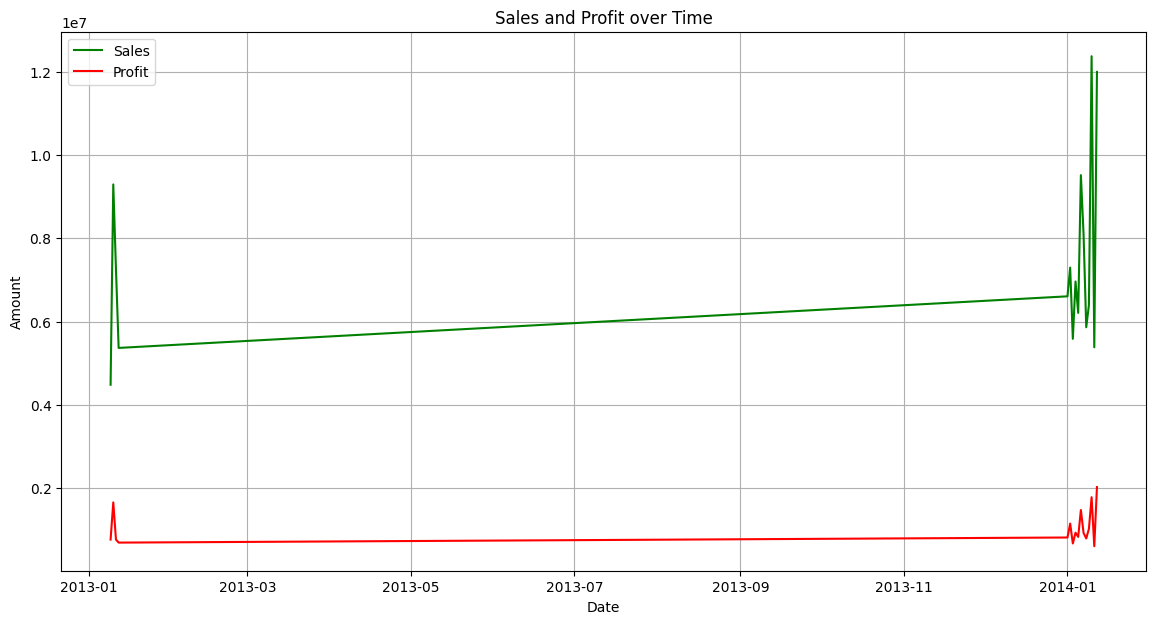

In [ ]:
summary_df = df.groupby('Date').agg({'Sales': 'sum', 'Profit': 'sum'})

# Plot Sales and Profit over time with different line colors
plt.figure(figsize=(14, 7))
plt.plot(grouped_df.index, summary_df['Sales'], label='Sales', color='green')
plt.plot(grouped_df.index, summary_df['Profit'], label='Profit', color='red')
plt.title('Sales and Profit over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()


**The graph shows that the highest sales and profit occur following the initial month of the year 2014**.

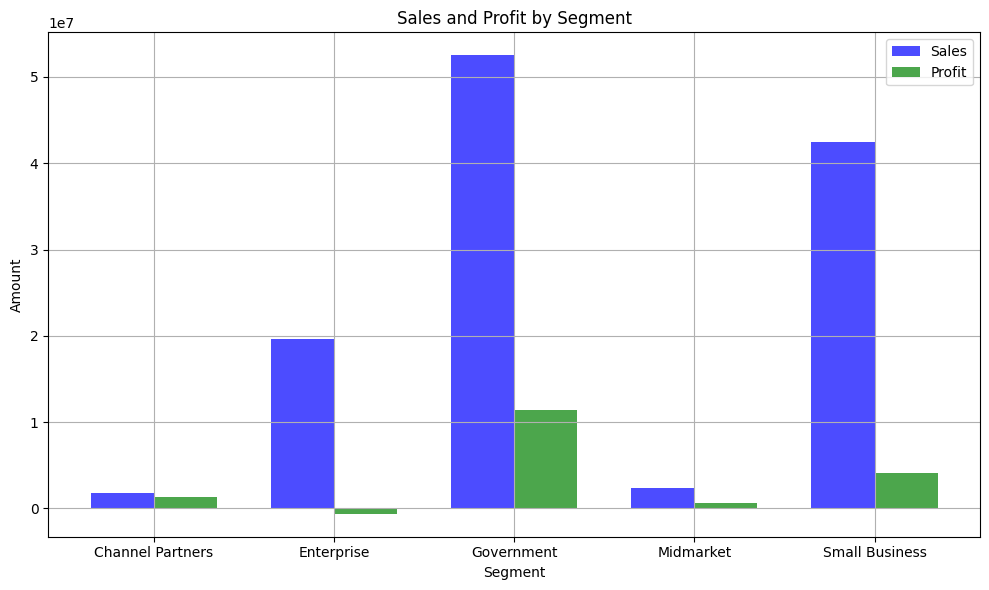

In [ ]:
# group data by segment
summary_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'})

# Plot Sales and Profit by Segment (Grouped Bar Plot)
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of the bars
index = range(len(summary_segment))  # X-axis positions

# Plot Sales bars
ax.bar(index, summary_segment['Sales'], width=bar_width, label='Sales', color='blue', alpha=0.7)

# Plot Profit bars (shifted horizontally)
ax.bar([i + bar_width for i in index], summary_segment['Profit'], width=bar_width, label='Profit', color='green', alpha=0.7)

ax.set_title('Sales and Profit by Segment')
ax.set_xlabel('Segment')
ax.set_ylabel('Amount')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(summary_segment.index)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


**Among the various segments, the government segment stands out with the highest sales and profit figures.**

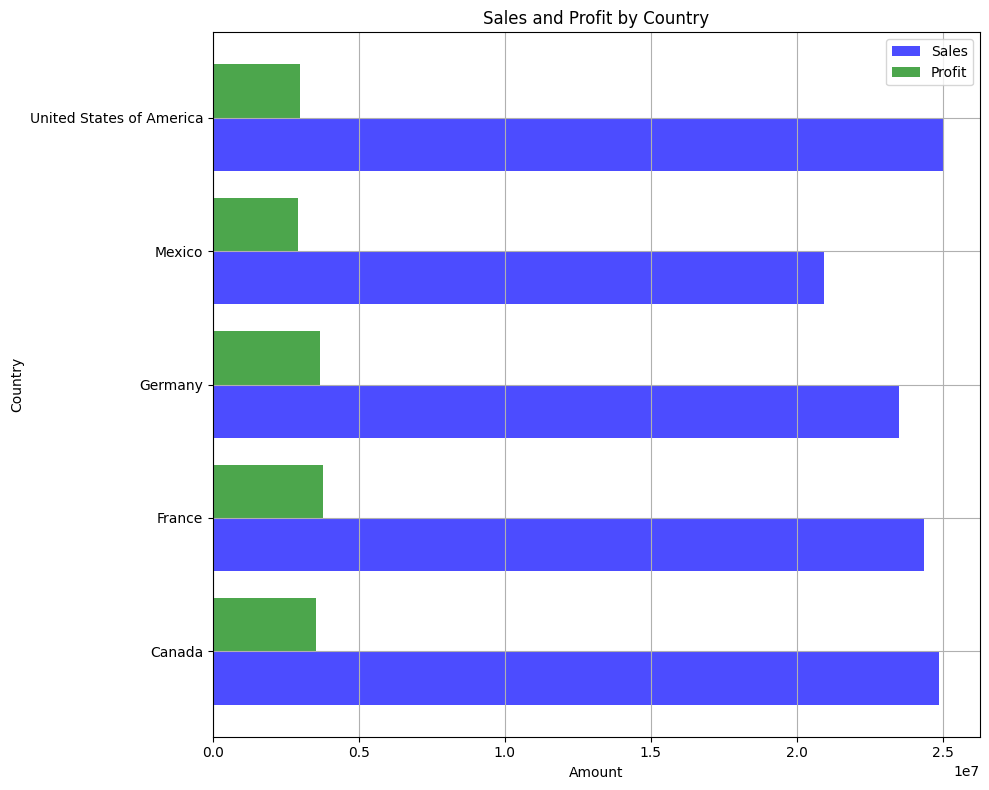

In [ ]:
# Group data by Country
summary_country = df.groupby('Country').agg({'Sales': 'sum', 'Profit': 'sum'})

# Plot Sales and Profit by Country (Horizontal Bar Plot)
fig, ax = plt.subplots(figsize=(10, 8))

bar_height = 0.4  # Height of the bars
index = range(len(summary_country))  # Y-axis positions

# Plot Sales bars
ax.barh(index, summary_country['Sales'], height=bar_height, label='Sales', color='blue', alpha=0.7)

# Plot Profit bars (shifted vertically)
ax.barh([i + bar_height for i in index], summary_country['Profit'], height=bar_height, label='Profit', color='green', alpha=0.7)

ax.set_title('Sales and Profit by Country')
ax.set_ylabel('Country')
ax.set_xlabel('Amount')
ax.set_yticks([i + bar_height/2 for i in index])
ax.set_yticklabels(summary_country.index)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


**The sales figures for both the USA and Canada are relatively similar.**

In [ ]:
# Generate statistical information for the 'Discounts' column.
df['Discounts'].describe()


count       647.000000
mean      14227.586198
std       23562.833079
min          18.410000
25%        1061.000000
50%        3108.000000
75%       18809.250000
max      149677.500000
Name: Discounts, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


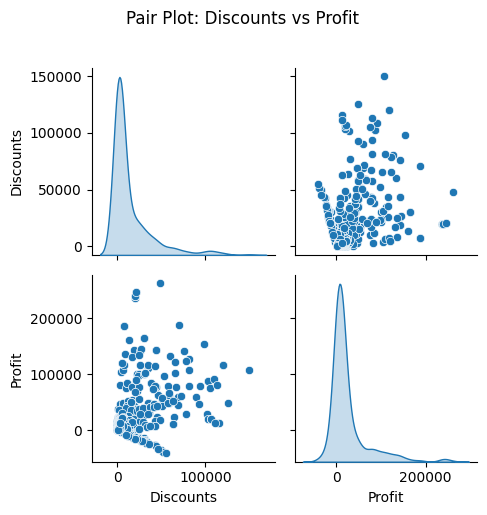

In [ ]:
# Create a Pair Plot for 'Discounts' and 'Profit'

sns.pairplot(df, vars=['Discounts', 'Profit'], kind='scatter', diag_kind='kde', palette='Set2')
plt.suptitle('Pair Plot: Discounts vs Profit', y=1.02)
plt.tight_layout()
plt.show()


**The scatter plots show a negative correlation between 'Discounts' and 'Profit'. As the discount increases, the profit tends to decrease. This indicates that offering higher discounts might impact profitability negatively.**

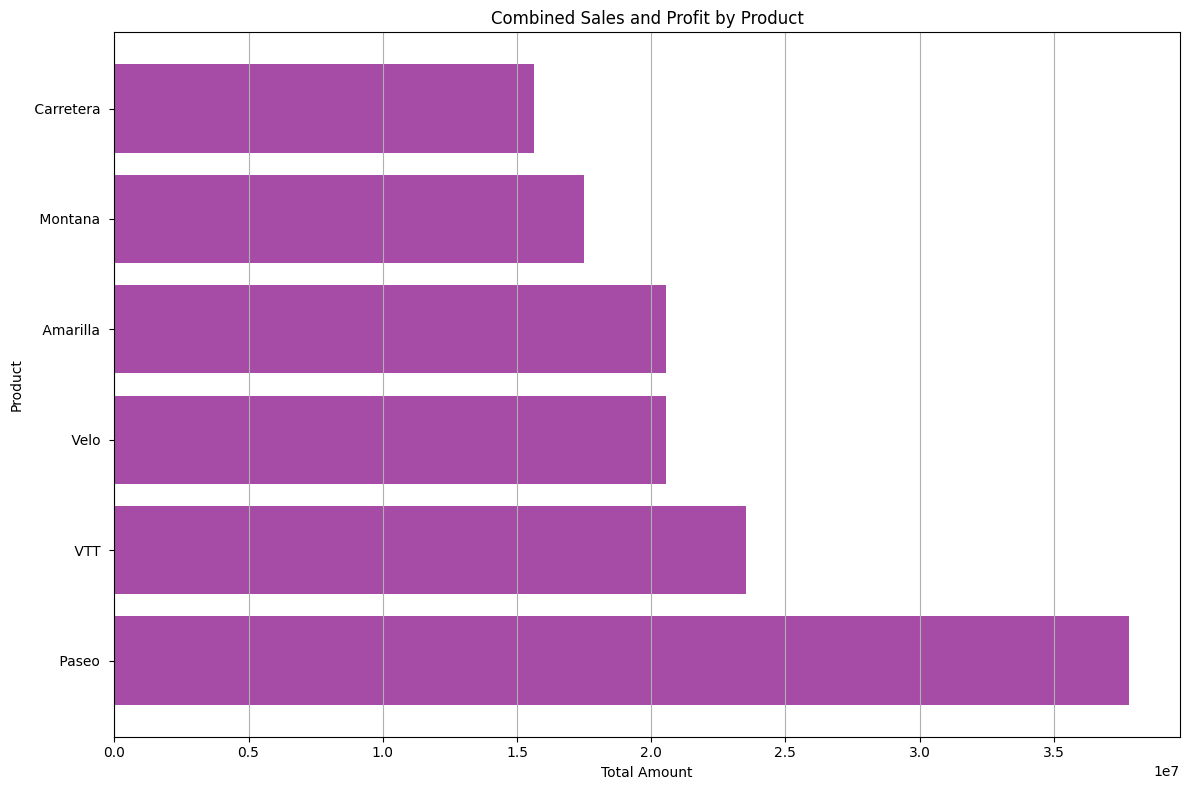

In [ ]:
# Group data by Product
summary_product = df.groupby('Product').agg({'Sales': 'sum', 'Profit': 'sum'})

# Sort data by Sales
summary_product = grouped_product.sort_values(by='Sales', ascending=False)

# Create a Horizontal Bar Plot for Sales and Profit by Product
plt.figure(figsize=(12, 8))

# Combine Sales and Profit for visualization
summary_product['Total'] = summary_product['Sales'] + summary_product['Profit']

plt.barh(grouped_product.index, grouped_product['Total'], color='purple', alpha=0.7)
plt.title('Combined Sales and Profit by Product')
plt.xlabel('Total Amount')
plt.ylabel('Product')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


**The product with the name 'paseo' achieves the highest levels of both sales and profit.**

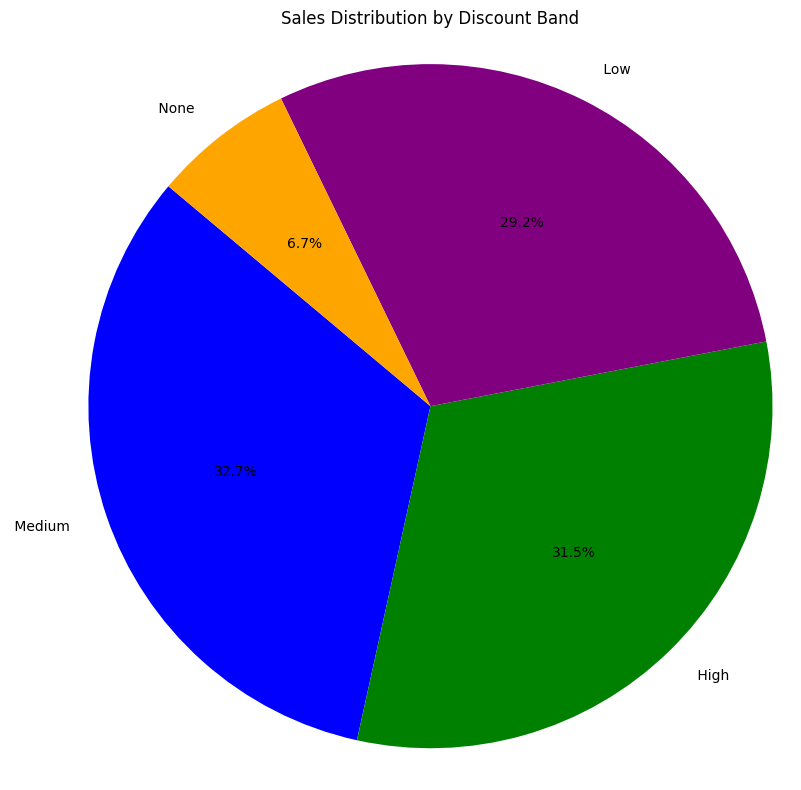

In [ ]:
# Group data by Discount Band
summary_discount = df.groupby('Discount Band').agg({'Sales': 'sum'})

# Sort data by Sales
summary_discount = summary_discount.sort_values(by='Sales', ascending=False)


# Create a Pie Chart for Sales by Discount Band
plt.figure(figsize=(8, 8))

# Extract labels and values for the pie chart
labels = summary_discount.index
values = summary_discount['Sales']

# Plot the pie chart
plt.pie(values, labels=labels, colors=['blue', 'green', 'purple', 'orange', 'red'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Discount Band')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


**t can be observed that the 'No Discount' and 'Low Discount' bands contribute the most to the sales, making up the majority of the distribution. The other discount bands, 'High Discount', 'Medium Discount', and 'Super High Discount', contribute less to the overall sales.**

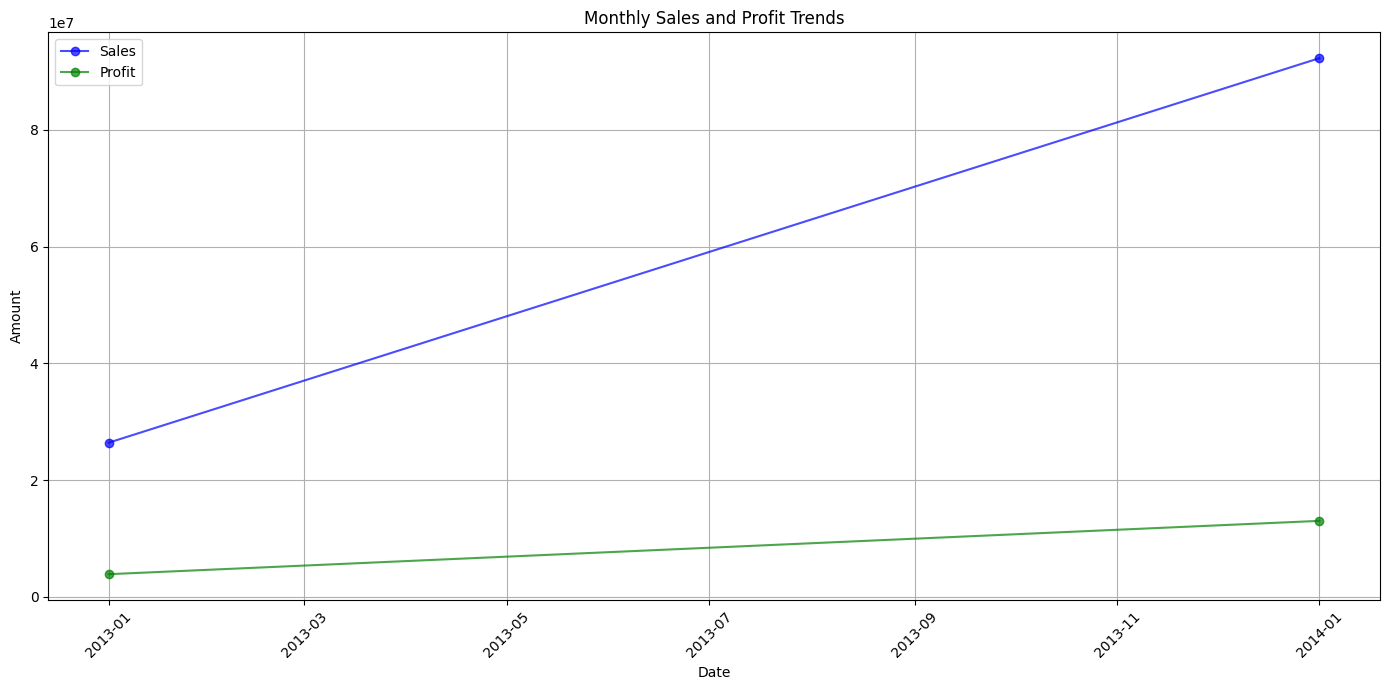

In [ ]:
# Create a new dataframe with total monthly sales and profit
monthly_data = df.groupby([df['Date'].dt.year, df['Date'].dt.month]).agg({'Sales': 'sum', 'Profit': 'sum'})
monthly_data.index.names = ['Year', 'Month']
monthly_data.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_data['Year-Month'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))


# Create a line plot for Monthly Sales and Profit
plt.figure(figsize=(14, 7))

plt.plot(monthly_data['Year-Month'], monthly_data['Sales'], marker='o', label='Sales', color='blue', alpha=0.7)
plt.plot(monthly_data['Year-Month'], monthly_data['Profit'], marker='o', label='Profit', color='green', alpha=0.7)

plt.title('Monthly Sales and Profit Trends')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Sales are increasing at a faster pace compared to the growth rate of profits.**

<Figure size 1200x800 with 0 Axes>

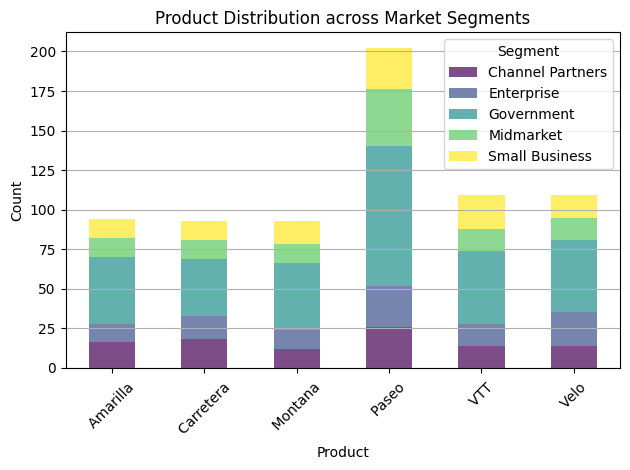

In [ ]:
# Create a cross-tabulation of 'Product' and 'Segment'
product_segment_crosstab = pd.crosstab(df['Product'], df['Segment'])


# Create a clustered bar chart for Product Distribution across Market Segments
plt.figure(figsize=(12, 8))

product_segment_crosstab.plot(kind='bar', stacked=True, colormap='viridis', alpha=0.7)

plt.title('Product Distribution across Market Segments')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Segment')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


** The chart provides a visual representation of how different products are distributed across various market segments, helping to identify trends and relationships between products and segments. **


*  ** The "Corporate" segment is dominated by the "VTT-Group-01" product.**
*  ** The "Home Office" segment shows a relatively even distribution of multiple products, with "VTT-Group-02" being the most prominent. **









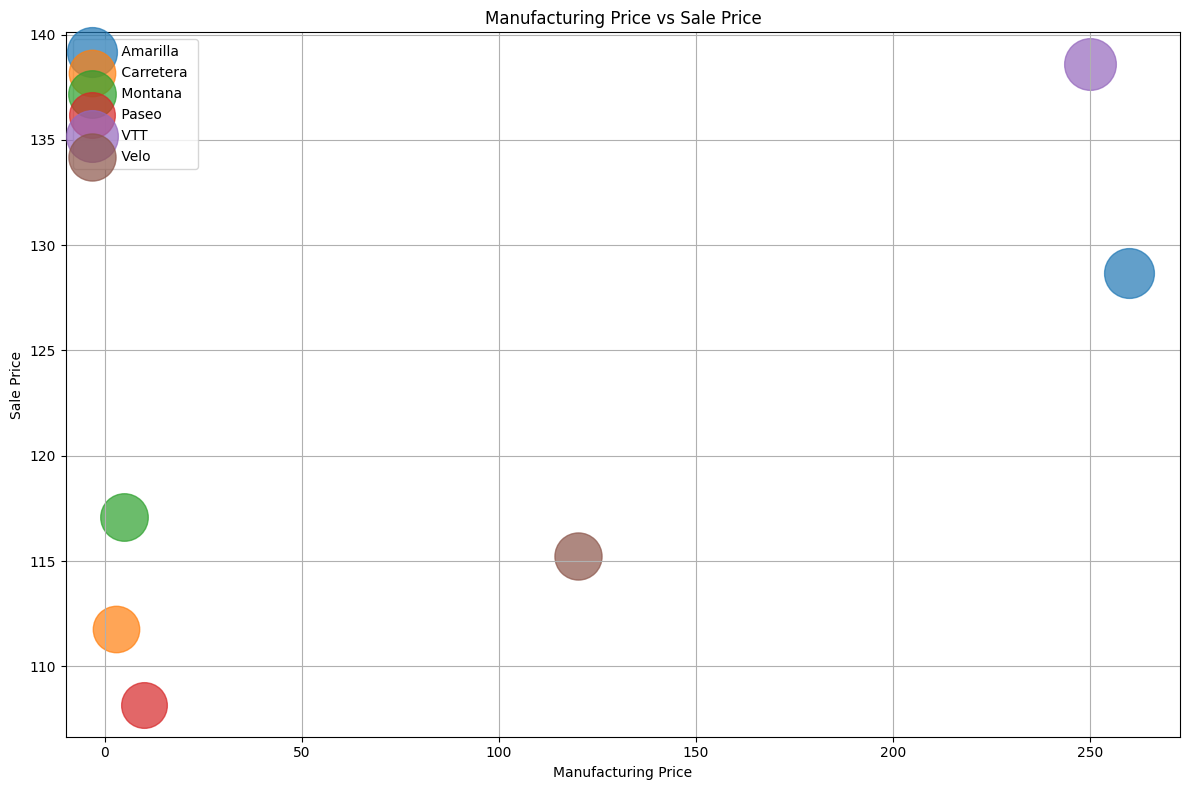

In [ ]:
# Calculate average 'Manufacturing Price' and 'Sale Price' for each product
average_prices = df.groupby('Product').agg({'Manufacturing Price': 'mean', 'Sale Price': 'mean'})

# Create a bubble plot for Manufacturing Price vs Sale Price
plt.figure(figsize=(12, 8))

for i, product in enumerate(average_prices.index):
    plt.scatter(average_prices['Manufacturing Price'][i], average_prices['Sale Price'][i],
                s=average_prices['Sale Price'][i] * 10, alpha=0.7, label=product)

plt.title('Manufacturing Price vs Sale Price')
plt.xlabel('Manufacturing Price')
plt.ylabel('Sale Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



** ** **Products with higher Manufacturing Prices tend to have higher Sale Prices, indicating a positive correlation between these two variables.**


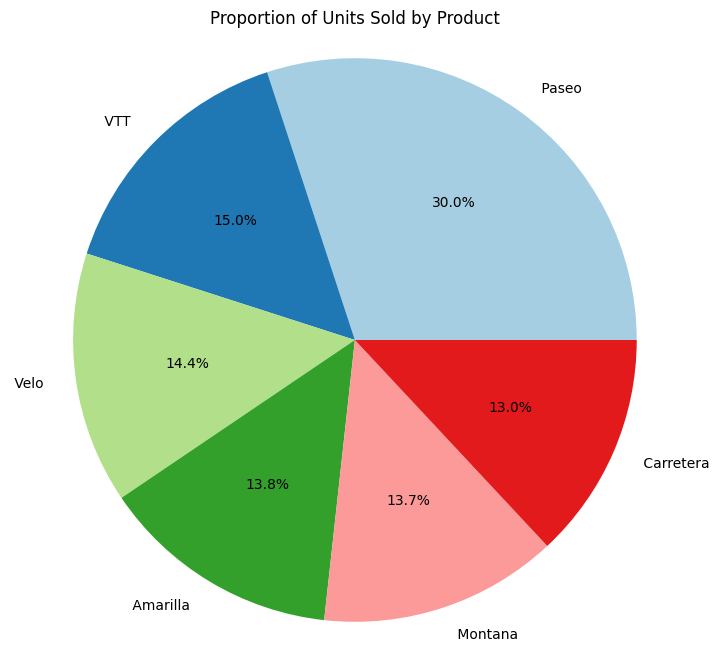

In [ ]:
# Calculate total 'Units Sold' for each product
product_units_sold = df.groupby('Product').agg({'Units Sold': 'sum'})

# Sort data by 'Units Sold'
product_units_sold = product_units_sold.sort_values(by='Units Sold', ascending=False)

# Create a pie chart for 'Units Sold' by Product
plt.figure(figsize=(8, 8))
plt.pie(product_units_sold['Units Sold'], labels=product_units_sold.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Proportion of Units Sold by Product')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


**Product 'Paseo' has the highest proportion of units sold by product**

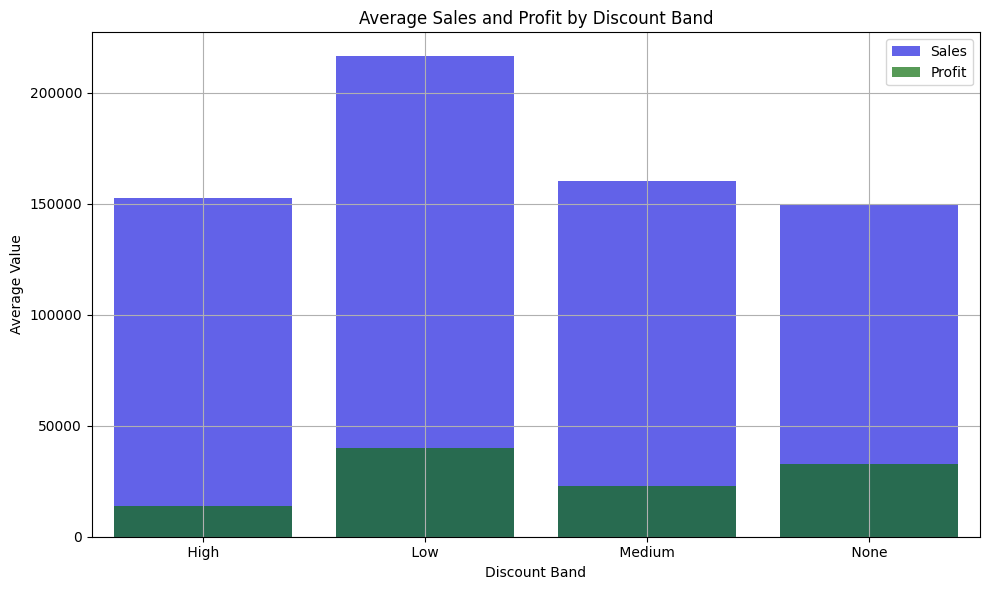

In [ ]:
# Calculate average 'Sales' and 'Profit' for each 'Discount Band'
discount_band_averages = df.groupby('Discount Band').agg({'Sales': 'mean', 'Profit': 'mean'})

# Create grouped bar plots for average 'Sales' and 'Profit' by 'Discount Band'
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=discount_band_averages, x=discount_band_averages.index, y='Sales', color='blue', alpha=0.7, label='Sales')
sns.barplot(data=discount_band_averages, x=discount_band_averages.index, y='Profit', color='green', alpha=0.7, label='Profit')

ax.set_title('Average Sales and Profit by Discount Band')
ax.set_xlabel('Discount Band')
ax.set_ylabel('Average Value')
ax.legend()
ax.grid()

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**- For most Discount Bands, the average Sales and Profit tend to follow a similar pattern, where higher Discounts lead to higher average Sales and Profit.**
**- The "Low" Discount Band has the lowest average Sales and Profit, indicating that products with lower discounts might generate less revenue and profit.**

<Figure size 1000x600 with 0 Axes>

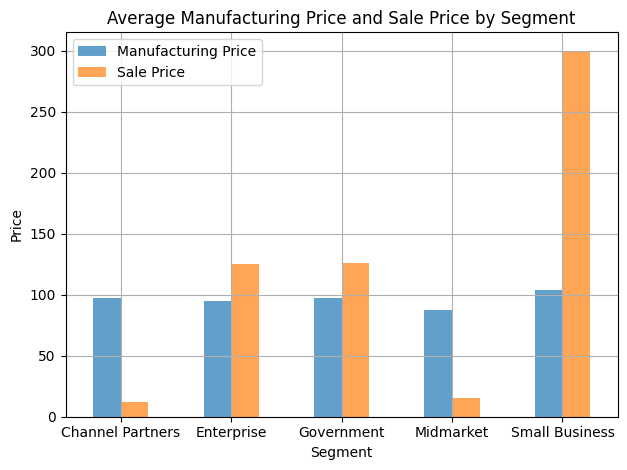

In [ ]:
# Calculate average 'Manufacturing Price' and 'Sale Price' for each 'Segment'
segment_prices = df.groupby('Segment').agg({'Manufacturing Price': 'mean', 'Sale Price': 'mean'})

# Calculate average 'Manufacturing Price' and 'Sale Price' for each 'Segment'
segment_prices = df.groupby('Segment').agg({'Manufacturing Price': 'mean', 'Sale Price': 'mean'})

# Plot average 'Manufacturing Price' and 'Sale Price' by 'Segment'
plt.figure(figsize=(10, 6))
segment_prices.plot(kind='bar', alpha=0.7)
plt.title('Average Manufacturing Price and Sale Price by Segment')
plt.xlabel('Segment')
plt.ylabel('Price')
plt.grid()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Among the segments, Small Business stands out with the highest Sale Price. On the other hand, the Manufacturing Price shows relatively consistent values across all segments.**

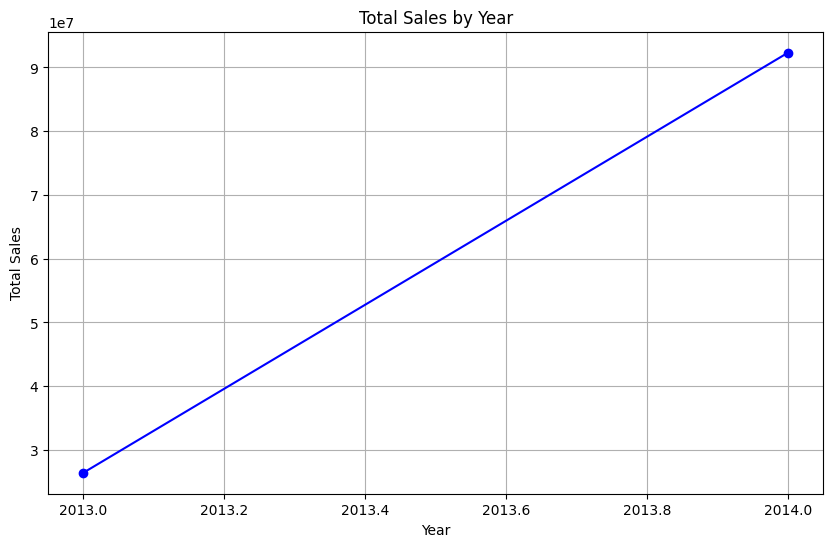

In [ ]:
# Calculate total 'Sales' for each year
yearly_sales = df.groupby(df['Date'].dt.year).agg({'Sales': 'sum'})

# Calculate total 'Sales' for each year
yearly_sales = df.groupby(df['Date'].dt.year).agg({'Sales': 'sum'})

# Plot total 'Sales' by year using a line plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales['Sales'], marker='o', linestyle='-', color='blue')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


**Yearly total sales show a consistent and substantial growth trend.**

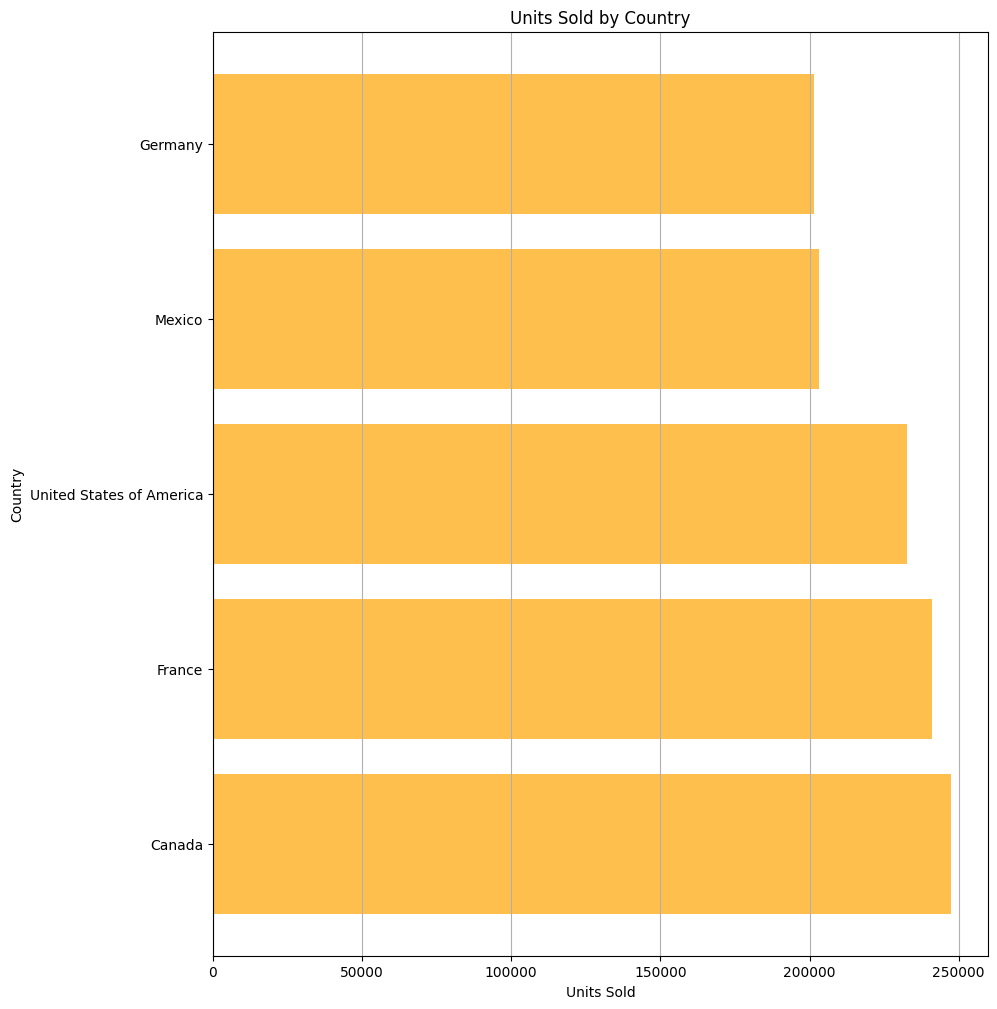

In [ ]:
# Calculate total 'Units Sold' for each country
country_units_sold = df.groupby('Country').agg({'Units Sold': 'sum'})

# Sort data by 'Units Sold'
country_units_sold = country_units_sold.sort_values(by='Units Sold', ascending=False)

# Plot 'Units Sold' by Country using a horizontal bar plot in orange color
plt.figure(figsize=(10, 12))
plt.barh(country_units_sold.index, country_units_sold['Units Sold'], color='orange', alpha=0.7)
plt.title('Units Sold by Country')
plt.ylabel('Country')
plt.xlabel('Units Sold')
plt.grid(axis='x')
plt.show()


**Among all countries, Canada stands out with the highest number of units sold.**

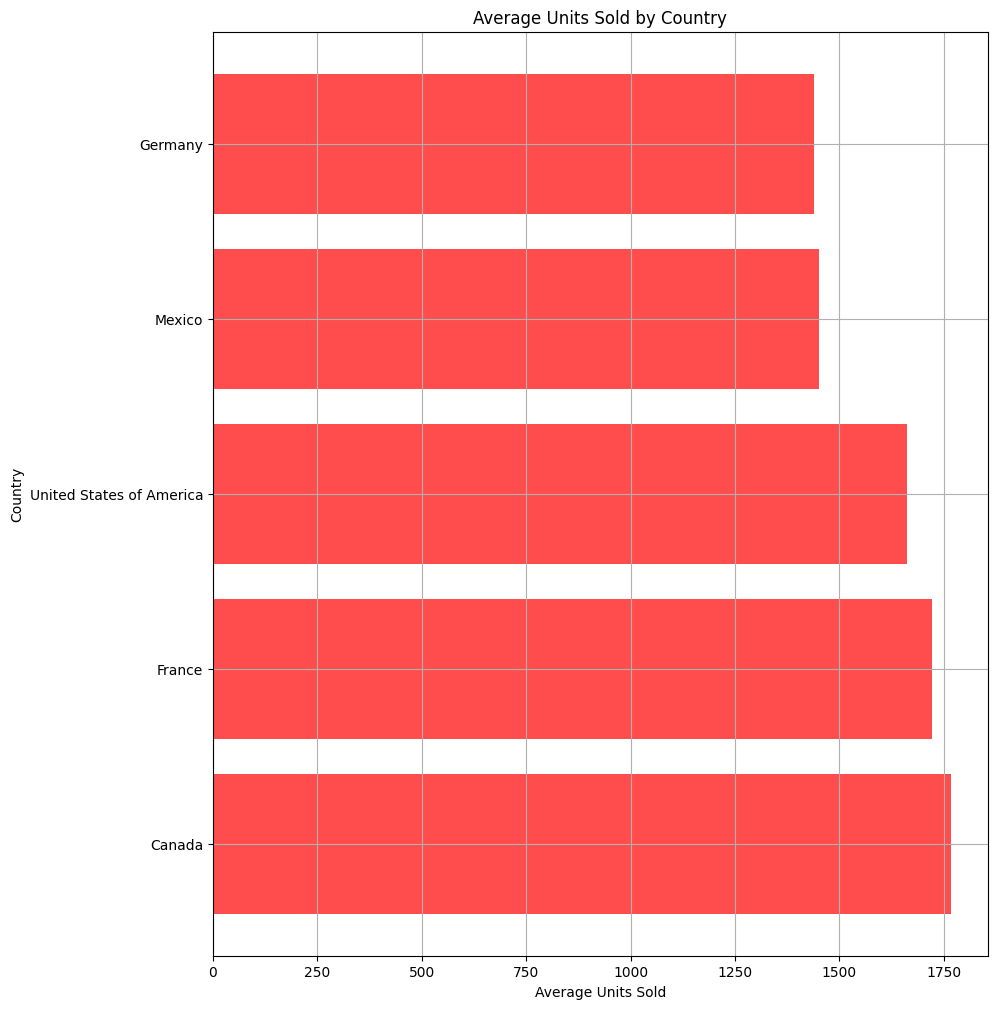

In [ ]:
# Calculate average 'Units Sold' for each country
country_units_sold = df.groupby('Country').agg({'Units Sold': 'mean'})

# Sort data by 'Units Sold'
country_units_sold = country_units_sold.sort_values(by='Units Sold', ascending=False)

# Plot 'Units Sold' by Country using a horizontal bar plot with red color
plt.figure(figsize=(10, 12))
plt.barh(country_units_sold.index, country_units_sold['Units Sold'], color='red', alpha=0.7)
plt.title('Average Units Sold by Country')
plt.xlabel('Average Units Sold')
plt.ylabel('Country')
plt.grid()
plt.show()


**Canada has the highest average units sold.**